In [384]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

import statsmodels.api as sm

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from dateutil.parser import parse

In [12]:
df_störungen = pd.read_excel("LHK_AI_Hackathon_2020.xlsx", sheet_name="Störungen")
#df['Wochentag'] = df['Wochentag'].dt.day_name()
df_anforderungen = pd.read_excel("LHK_AI_Hackathon_2020.xlsx", sheet_name="Anforderungen")

#for col in df_störungen.columns:
#    print(col)

In [13]:
df_merged = pd.concat([df_störungen, df_anforderungen], ignore_index = True)

In [14]:
df_merged.describe()

,Erstellt von Titel,Erstellt am,In Bearbeitung seit,Geschlossen am,Titel,Ersteller Amt kurz,Ersteller Amt,Klassentyp
count,5077,5077,5077,5077,5076,4058,4425,5077
unique,2,5060,5021,5020,4078,59,443,2
top,Benutzer,2020-03-31 09:18:26,2020-02-21 08:03:05,2020-02-21 08:04:41,E-Mail in Quarantäne,Amt 54,53.0.3,Störung
freq,3436,2,9,15,330,477,301,3045
first,NaN,2019-12-19 17:22:41,2019-12-20 06:26:46,2019-12-20 06:27:00,NaN,NaN,NaN,NaN
last,NaN,2020-05-19 16:21:30,2020-05-19 16:21:39,2020-05-19 17:28:21,NaN,NaN,NaN,NaN


In [21]:
# Lets work with "Ersteller Amt kurz", since it has less unique values
print("Unique values in col 'Ersteller Amt kurz': " + str(len(df_merged['Ersteller Amt kurz'].unique())))
print("Unique values in col 'Ersteller Amt': " + str(len(df_merged['Ersteller Amt'].unique())))

Unique values in col 'Ersteller Amt kurz': 60
Unique values in col 'Ersteller Amt': 444


In [26]:
print(df_merged['In Bearbeitung seit'].dtype)
print(df_merged['Geschlossen am'].dtype)

df_merged['Bearbeitungsdauer'] = df_merged['Geschlossen am'] - df_merged['In Bearbeitung seit']


datetime64[ns]
datetime64[ns]


In [194]:
df_störungen = pd.read_excel("C06 und C07 Hackathon Groß.xlsx", sheet_name="Störungen")
#df['Wochentag'] = df['Wochentag'].dt.day_name()
df_anforderungen = pd.read_excel("C06 und C07 Hackathon Groß.xlsx", sheet_name="Anforderungen")

In [207]:
df_merged = pd.concat([df_störungen, df_anforderungen], ignore_index = True)

In [208]:
df_merged.describe()

,Erstellt am,Latest Assignment Erstellt am,Aktualisiert am,Ersteller Amt kurz,Ersteller Amt,Klassentyp
count,181386,180360,181386,133809,150491,181386
unique,178872,175024,176605,79,704,2
top,2018-10-26 17:31:15,2016-07-12 12:12:11,2018-07-16 06:16:14,Amt 54,53.0.3,Störung
freq,5,21,24,17474,2992,146063
first,2010-01-15 13:40:06,2010-01-20 15:33:15,2010-01-20 15:33:27,NaN,NaN,NaN
last,2020-06-05 14:53:17,2020-06-05 14:59:11,2020-06-05 15:00:37,NaN,NaN,NaN


In [211]:
#df_merged.head(15)

In [212]:
#df_merged = df_merged.dropna(subset=['Klassentyp'])
#df_merged.describe()

In [213]:
df_merged['Bearbeitungsdauer'] = df_merged['Aktualisiert am'] - df_merged['Erstellt am']
df_merged["Bearbeitungsdauer"] = df_merged["Bearbeitungsdauer"].dt.total_seconds().div(60).astype(int)

In [214]:
df_merged['Tag'] = df_merged['Erstellt am'].dt.date
df_merged['Stunde'] = df_merged['Erstellt am'].dt.hour
#df_merged['Tag und Stunde'] = str(df_merged['Tag'].strtime("%d.%m.%y, ")) + str(df_merged['Stunde'])

In [177]:
#df_merged = df_merged.drop(['Tag und Stunde'], axis= 1)
#print(df_merged['Tag'].dtype)
#df_merged["Bearbeitungsdauer"] = df_merged["Bearbeitungsdauer"].dt.total_seconds().div(60).astype(int)
#https://www.coursera.org/specializations/tensorflow-in-practice?
#df_merged.head()

In [164]:
#df_merged['Tag'].loc[0].strftime("%d.%m.%y, ")

In [489]:
#print(df_merged['Tag'].loc[0].strftime("%d.%m.%y, "))

df_merged["Datetime"] = pd.to_datetime(df_merged["Erstellt am"], format='%Y-%m-%d%h',)
#df_merged["Datetime"] = df_merged['Datetime'].dt.floor('h')
df_merged["Datetime"] = df_merged['Datetime'].dt.floor('d')
values = df_merged["Datetime"].value_counts()
timeseries = pd.DataFrame(pd.date_range(start=np.min(df_merged["Datetime"]),end=np.max(df_merged["Datetime"]), freq = "1d"),columns=["Date"])
timeseries["counts"] = 0
for i in range(len(values)):
    
    try:
        timeseries.loc[np.where(timeseries["Date"] == values.index[i])[0][0],"counts"] = values.values[i]
    except:
        print(i)
#values = df_merged["Datetime"].value_counts()

In [216]:
bins_labels = [0, 5, 10, 30, 60, 60*4, 60*8, 60*24, 60*24*2, 60*24*7, 60*24*30*6]
#bin_labes = []

#df_merged["Bearbeitungsdauer"] = pd.to_numeric(df_merged["Bearbeitungsdauer"])
df_merged["Dauer Label"] = pd.cut(df_merged["Bearbeitungsdauer"], labels=range(len(bins_labels)-1),bins=bins_labels)


In [217]:
df_merged.head(5)

,Erstellt am,Latest Assignment Erstellt am,Aktualisiert am,Ersteller Amt kurz,Ersteller Amt,Klassentyp,Bearbeitungsdauer,Tag,Stunde,Datetime,Dauer Label
0,2020-06-05 14:53:17,2020-06-05 14:56:02,2020-06-05 14:56:48,Amt 54,54.3 K-03,Störung,3,2020-06-05,14,2020-06-05 14:00:00,0
1,2020-06-05 13:44:17,2020-06-05 13:58:36,2020-06-05 13:58:46,66,66.2.2,Störung,14,2020-06-05,13,2020-06-05 13:00:00,2
2,2020-06-05 13:29:17,2020-06-05 14:01:00,2020-06-05 14:02:02,Amt 53,53.0.5,Störung,32,2020-06-05,13,2020-06-05 13:00:00,3
3,2020-06-05 13:23:16,2020-06-05 13:29:28,2020-06-05 13:32:24,Amt 64,64.1.1,Störung,9,2020-06-05,13,2020-06-05 13:00:00,1
5,2020-06-05 12:54:15,2020-06-05 12:54:52,2020-06-05 12:56:00,Amt 10,10.5.3,Störung,1,2020-06-05,12,2020-06-05 12:00:00,0


In [661]:
#df_merged.groupby(df_merged['Date'].dt.day).count().plot(kind="bar")
#timeseries["Date"][-50:]

In [491]:
df_daily_time_series = timeseries
df_daily_time_series['Erstellt am'] = df_daily_time_series['counts']

In [492]:
df_daily_time_series.head()

,Date,counts,Erstellt am
0,2010-01-15,6,6
1,2010-01-16,0,0
2,2010-01-17,0,0
3,2010-01-18,1,1
4,2010-01-19,0,0


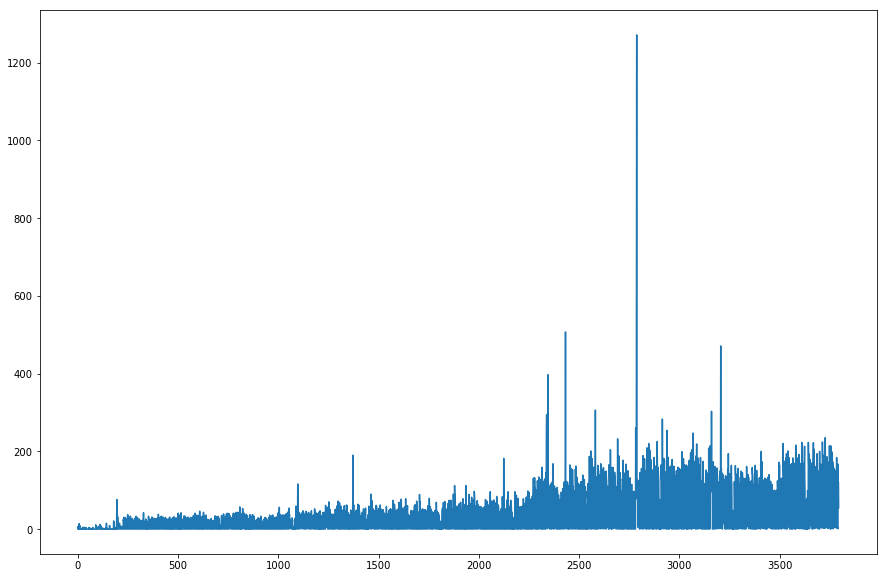

In [493]:
plt.figure(figsize=(15,10))
plt.plot(df_daily_time_series['Erstellt am'])
plt.show()

## ARIMA Modell

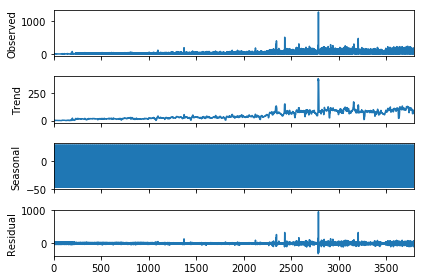

In [494]:
temp = seasonal_decompose(df_daily_time_series['Erstellt am'], model='additive', freq=7).plot()
result_ad = seasonal_decompose(df_daily_time_series['Erstellt am'], model='additive', freq=7)

In [495]:
df_reconstructed = pd.concat([result_ad.seasonal, result_ad.trend, result_ad.resid, result_ad.observed], axis=1)
df_reconstructed.columns =['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

,seas,trend,resid,actual_values
0,2.095336,NaN,NaN,6
1,-43.972791,NaN,NaN,0
2,-46.385519,NaN,NaN,0
3,29.507162,1.714286,-30.221448,1
4,22.569893,2.857143,-25.427035,0


In [496]:
# Augmented Dickey Fuller Test

#HO: Data is non-stationary

result = adfuller(df_reconstructed.actual_values.values, autolag='AIC')
print('ADF Statistic: ' +str(result[0]))
print('p-value: ' + str(result[1]))
for key, value in result[4].items():
    print('Critial Values:')
    print(str(key)+" " +str(value))

ADF Statistic: -3.340583520773763
p-value: 0.013159026512170985
Critial Values:
5% -2.8623081795146947
Critial Values:
1% -3.4320885136089414
Critial Values:
10% -2.567178912401847


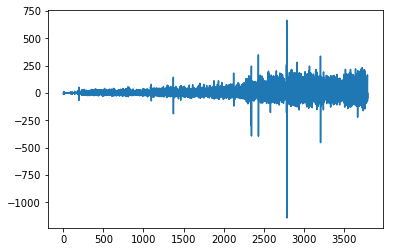

In [497]:
plt.plot(df_reconstructed.actual_values.diff())

In [245]:
#plot_acf(df_reconstructed.actual_values.diff().dropna())

In [246]:
#plot_acf(df_reconstructed.actual_values.diff().dropna())

In [498]:
#The first difference makes the data stationary an the 5% confidence level

#result = adfuller(df_reconstructed.actual_values.diff().dropna().values, autolag='AIC')
result = adfuller(df_reconstructed.actual_values.values, autolag='AIC')
print('ADF Statistic: ' +str(result[0]))
print('p-value: ' + str(result[1]))
for key, value in result[4].items():
    print('Critial Values:')
    print(str(key)+" " +str(value))

ADF Statistic: -3.340583520773763
p-value: 0.013159026512170985
Critial Values:
5% -2.8623081795146947
Critial Values:
1% -3.4320885136089414
Critial Values:
10% -2.567178912401847


The time series is stationary, no need for differencing.

In [660]:
#df_reconstructed

In [500]:
mod = sm.tsa.statespace.SARIMAX(df_reconstructed.actual_values,
                                order=(4, 1, 3),
                                seasonal_order= (1,1,1,7),
                                )

results = mod.fit()

C:\Users\timjo\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\timjo\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\timjo\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [501]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                     actual_values   No. Observations:                 3795
Model:             SARIMAX(4, 1, 3)x(1, 1, 1, 7)   Log Likelihood              -18585.218
Date:                           Sat, 06 Jun 2020   AIC                          37190.435
Time:                                   13:20:05   BIC                          37252.829
Sample:                                        0   HQIC                         37212.614
                                          - 3795                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2552      0.028    -44.632      0.000      -1.310      -1.200
ar.L2         -0.3212      0.023    -13.978      0.000      -0.366      -0.276
ar.L3          0.2693      0.019     14.174      0.000       0.232       0.307
ar.L4         -0.0412      0.017     -2.367      0.018      -0.075      -0.007
ma.L1          0.6705      0.030     22.176      0.000       0.611       0.730
ma.L2         -0.7460      0.017    -42.753      0.000      -0.780      -0.712
ma.L3         -0.9174      0.033    -28.163      0.000      -0.981      -0.854
ar.S.L7        0.0792      0.010      8.297      0.000       0.061       0.098
ma.S.L7       -0.9550      0.006   -171.858      0.000      -0.966      -0.944
sigma2      1061.7925      6.051    175.465      0.000    1049.932    1073.653
===================================================================================
Ljung-Box (Q):                       52.76   Jarque-Bera (JB):          12494162.19
Prob(Q):                              0.09   Prob(JB):                         0.00
Heteroskedasticity (H):              38.32   Skew:                            10.16
Prob(H) (two-sided):                  0.00   Kurtosis:                       283.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

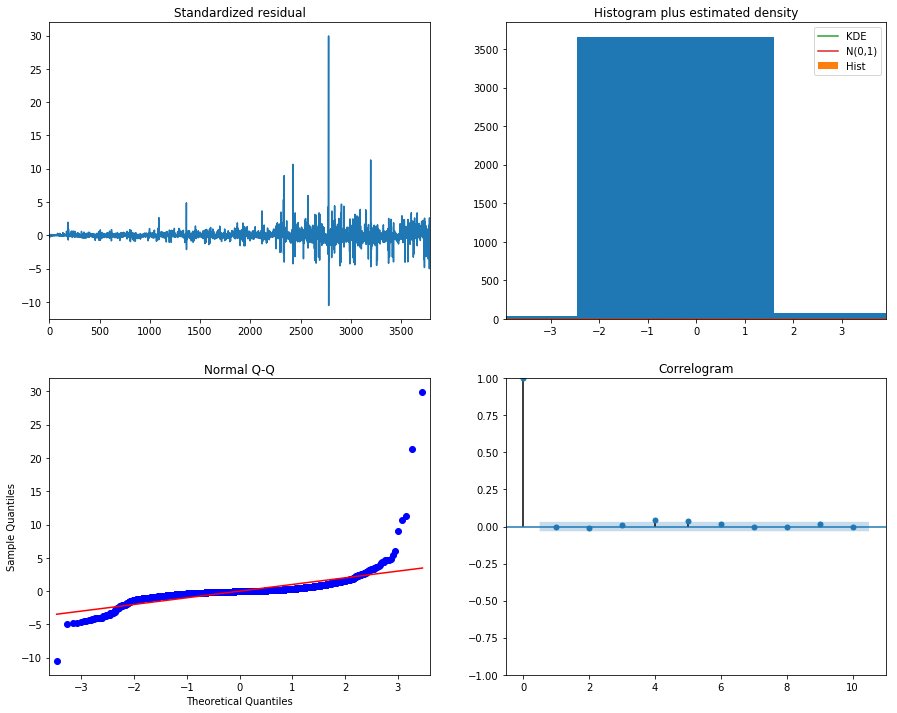

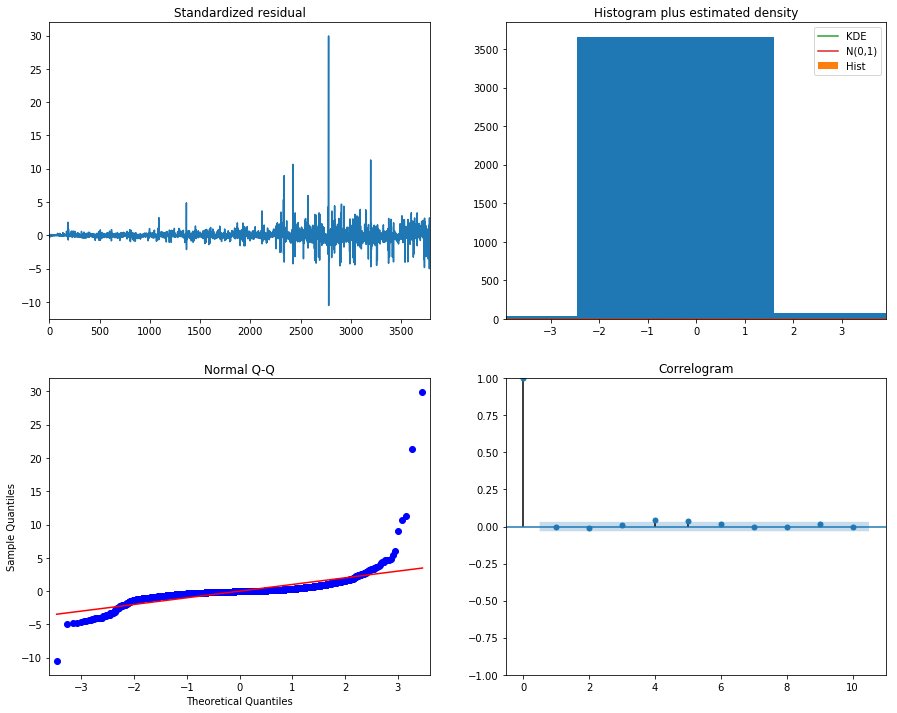

In [502]:
results.plot_diagnostics(figsize = (15,12))

In [576]:
day_start = day_end - 50
day_end = 3795
forecast_period = 21

In [577]:
pred_start = 1
# dynamic= False ensures that we produce one-step-ahead-forecasts, meaning that forecasts at each point are generated
#using the full history up to that point
pred = results.get_prediction(start=pred_start, dynamic=False)
pred_dynamic = results.get_prediction(dynamic=day_end-forecast_period)
#get the 95% confidence intervals
pred_ci = pred.conf_int()

pred_ci_forecast = pred_dynamic.conf_int()
#print(np.cumsum(pred_ci.iloc[:, 0]))

In [659]:
#df_reconstructed[-50:]
#(timeseries["Date"][-50:].tolist())
timeseries["Tag"] = timeseries["Date"].dt.strftime('%Y-%m-%d')
#timeseries["Tag"][-50:].tolist()
timeseries[-50:]

,Date,counts,Erstellt am,Tag
3745,2020-04-17,105,105,2020-04-17
3746,2020-04-18,6,6,2020-04-18
3747,2020-04-19,3,3,2020-04-19
3748,2020-04-20,214,214,2020-04-20
3749,2020-04-21,180,180,2020-04-21
3750,2020-04-22,167,167,2020-04-22
3751,2020-04-23,152,152,2020-04-23
3752,2020-04-24,91,91,2020-04-24
3753,2020-04-25,0,0,2020-04-25
3754,2020-04-26,1,1,2020-04-26


7


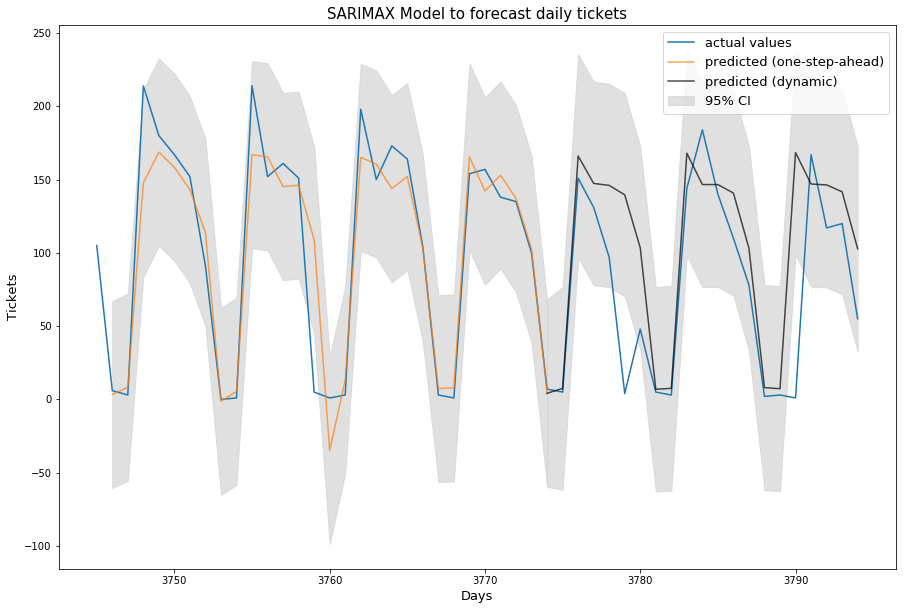

In [657]:


df_temp = df_reconstructed.actual_values
#adjust the index of the original data
#df_temp.index = np.arange(1,len(df_temp)+1)

#adjust the index of the original data
#df_temp.index = np.arange(1,len(df_temp)+1)

#ax = df_temp[:-1].plot(label = 'observed')

pred_temp = pred.predicted_mean.copy()
#pred_temp.index = np.arange(0,len(df_temp)-1)

pred_ci_temp = pred_ci.copy()

pred_ci_temp_forecast = pred_ci_forecast.copy()
#pred_ci_temp.index = np.arange(0,len(pred_ci_temp))

#pred.predicted_mean.plot(ax=ax, label='predicted', alpha=.7)
plt.figure(figsize=(15,10))
plt.plot(df_temp[day_start:day_end], label='actual values')
plt.plot(pred_temp[day_start:day_end-forecast_period], label='predicted (one-step-ahead)', alpha=.7)
plt.plot(pred_dynamic.predicted_mean[day_end-forecast_period:day_end], label='predicted (dynamic)', alpha=.7, color="black")

#draw confidence intervals
#"""
plt.fill_between(pred_ci_temp[day_start:day_end-forecast_period].index,
                pred_ci_temp[day_start:day_end-forecast_period].iloc[:, 0],
                pred_ci_temp[day_start:day_end-forecast_period].iloc[:, 1], color='lightgrey', alpha=.7, label ="95% CI")
#"""
#"""
plt.fill_between(pred_ci_temp_forecast[day_end-forecast_period:day_end].index,
                pred_ci_temp_forecast[day_end-forecast_period:day_end].iloc[:, 0],
                pred_ci_temp_forecast[day_end-forecast_period:day_end].iloc[:, 1], color='lightgrey', alpha=.7)
#"""

#plt.figure(figsize=(15,10))
plt.title("SARIMAX Model to forecast daily tickets", size=15)
plt.ylabel("Tickets", size = 13)
#plt.xticks(timeseries[-50:])
plt.xlabel("Days", size = 13)


locs, labels = plt.xticks()
print(len(labels))
#plt.xticks(locs,timeseries["Tag"][::7].tolist())
#timeseries["Date"][-50:]
plt.legend(fontsize=13)

plt.show()

In [542]:
y_forecasted = pred.predicted_mean
y_truth = df_reconstructed.actual_values

mse = ((y_forecasted - y_truth) ** 2).mean()

print("The Mean squared Error of our forecasts is " + str(round(mse,2)))
print("The root mean squared error is " + str(round(mse**(0.5),2)))

print(" ")


mae = ((y_forecasted - y_truth).abs()).mean()
print("The mean absolute error is " + str(round(mae,2)))

print("")


mape = np.mean(np.abs(y_forecasted - y_truth)/np.abs(y_truth))
print(mape)

The Mean squared Error of our forecasts is 1062.72
The root mean squared error is 32.6
 
The mean absolute error is 13.71

inf


# Holt Winters Modell

forecast = base level + trend + seasonal factor

each has a smoothing constant:
alpha ->
beta ->
gamma ->

seasonal factor = aktueller Wert - Durchschnittswert der aktuellen Season

In [564]:
day_start = day_end - 50
day_end = 3795
forecast_period = 21

0

In [612]:
fit1 = ExponentialSmoothing(df_reconstructed.actual_values, seasonal_periods = 7, trend='add', seasonal='add', damped=True).fit()
#fit2 = ExponentialSmoothing(df_reconstructed.dropna().actual_values[:forecast_period], seasonal_periods = 7, trend='add', seasonal='add', damped=True).fit()

In [613]:
#df_reconstructed.actual_values
print(len(df_reconstructed.index))
print(type(df_reconstructed.index))
print(len(df_reconstructed.dropna()))

3795
<class 'pandas.core.indexes.range.RangeIndex'>
3789


In [614]:
day_start = day_end - 50
day_end = 3795
forecast_period = 21

In [635]:

#es_pred = fit2.forecast(50)
es_pred = fit1.predict(start= day_end-forecast_period-1, end = day_end-1)
len(es_pred)

22

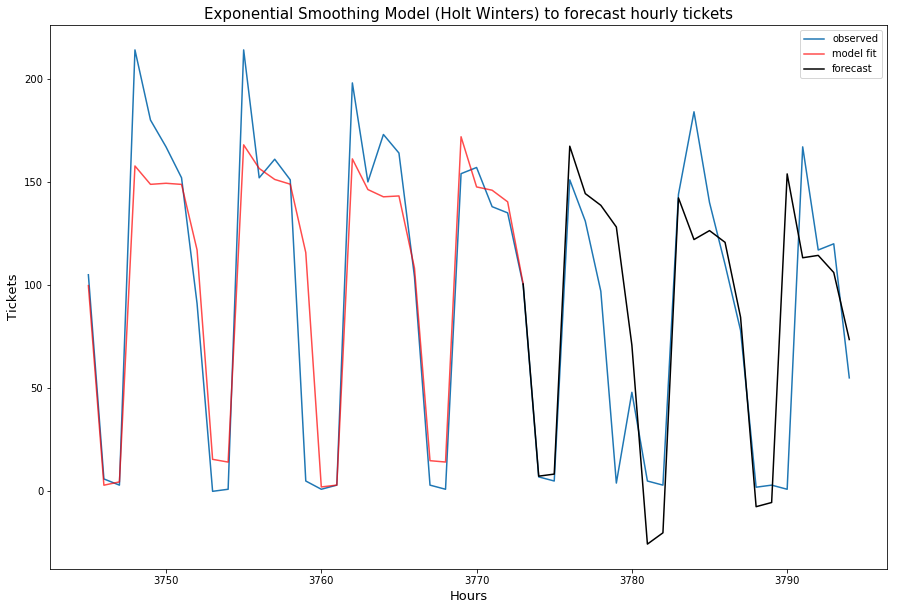

In [658]:
#day_start = 2600
#day_end = 2700


#es_pred = fit1.forecast(2650) 
#es_pred = fit1.predict()

plt.figure(figsize=(15,10))
plt.plot(df_reconstructed.actual_values[day_start:day_end], label ="observed")
plt.plot(fit1.fittedvalues[day_start:day_end-forecast_period], label="model fit", alpha=.7, color="red")
plt.plot(es_pred, label="forecast", color="black")
#plt.plot(fit2.fittedvalues[day_start:day_end], label="NEW", alpha=.7, color="black")
#plt.plot(es_pred, label="forecast", alpha=.7, color="black")
plt.title("Exponential Smoothing Model (Holt Winters) to forecast hourly tickets", size=15)
plt.ylabel("Tickets", size = 13)
plt.xlabel("Hours", size = 13)
plt.legend(fontsize=13)

#plt.xticks(rotation=45, ticks = timeseries["Date"][::5].values, labels = timeseries["Date"][::5].values)
#plt.xticks(timeseries["Date"][::5].values, timeseries["Date"][::5].values, rotation=45)

#plt.plot(df_reconstructed.actual_values[1:2700], label ="observed")
plt.legend()

In [617]:
y_forecasted = fit1.fittedvalues
y_truth = df_reconstructed.actual_values

mse = ((y_forecasted - y_truth) ** 2).mean()

print("The Mean squared Error of our forecasts is " + str(round(mse,2)))
print("The root mean squared error is " + str(round(mse**(0.5),2)))

print(" ")


mae = ((y_forecasted - y_truth).abs()).mean()
print("The mean absolute error is " + str(round(mae,2)))

print("")


mape = np.mean(np.abs(y_forecasted - y_truth)/np.abs(y_truth))
print(mape)

The Mean squared Error of our forecasts is 1217.27
The root mean squared error is 34.89
 
The mean absolute error is 14.6

inf
